In [0]:
# Read data from Mongodb

In [0]:
%pip install vaderSentiment
%pip install pysparkling
%pip install h2o
%pip install h2o-pysparkling-3.2

Python interpreter will be restarted.
Requirement already satisfied: vaderSentiment in /databricks/python3/lib/python3.8/site-packages (3.3.2)
Requirement already satisfied: requests in /databricks/python3/lib/python3.8/site-packages (from vaderSentiment) (2.25.1)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests->vaderSentiment) (2020.12.5)
Requirement already satisfied: chardet<5,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests->vaderSentiment) (4.0.0)
Requirement already satisfied: urllib3<1.27,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests->vaderSentiment) (1.25.11)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests->vaderSentiment) (2.10)
Python interpreter will be restarted.
Python interpreter will be restarted.
Requirement already satisfied: pysparkling in /databricks/python3/lib/python3.8/site-packages (0.6.1)
Requirement already satisfied: future>=0.15 in /databricks/python3/lib/python3.8/site-packages (from pysparkling) (0.18.2)
Requirement already satisfied: boto>=2.36.0 in /databricks/python3/lib/python3.8/site-packages (from pysparkling) (2.49.0)
Requirement already satisfied: requests>=2.6.0 in /databricks/python3/lib/python3.8/site-packages (from pysparkling) (2.25.1)
Requirement already satisfied: pytz>=2019.3 in /databricks/python3/lib/python3.8/site-packages (from pysparkling) (2020.5)
Requirement already satisfied: python-dateutil>=2.8.0 in /databricks/python3/lib/python3.8/site-packages (from pysparkling) (2.8.1)
Requirement already satisfied: six>=1.5 in /databricks/python3/lib/python3.8/site-packages (from python-dateutil>=2.8.0->pysparkling) (1.15.0)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.6.0->pysparkling) (2020.12.5)
Requirement already satisfied: chardet<5,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.6.0->pysparkling) (4.0.0)
Requirement already satisfied: urllib3<1.27,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.6.0->pysparkling) (1.25.11)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.6.0->pysparkling) (2.10)
Python interpreter will be restarted.
Python interpreter will be restarted.
Requirement already satisfied: h2o in /databricks/python3/lib/python3.8/site-packages (3.36.0.3)
Requirement already satisfied: future in /databricks/python3/lib/python3.8/site-packages (from h2o) (0.18.2)
Requirement already satisfied: tabulate in /databricks/python3/lib/python3.8/site-packages (from h2o) (0.8.9)
Requirement already satisfied: requests in /databricks/python3/lib/python3.8/site-packages (from h2o) (2.25.1)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests->h2o) (2020.12.5)
Requirement already satisfied: chardet<5,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests->h2o) (4.0.0)
Requirement already satisfied: urllib3<1.27,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests->h2o) (1.25.11)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests->h2o) (2.10)
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting h2o-pysparkling-3.2
 Using cached h2o_pysparkling_3.2-3.36.0.3.post1-py2.py3-none-any.whl
Requirement already satisfied: future in /databricks/python3/lib/python3.8/site-packages (from h2o-pysparkling-3.2) (0.18.2)
Requirement already satisfied: tabulate in /databricks/python3/lib/python3.8/site-packages (from h2o-pysparkling-3.2) (0.8.9)
Requirement already satisfied: requests in /databricks/python3/lib/python3.8/site-packages (from h2o-pysparkling-3.2) (2.25.1)
Requirement already satisfied: certifi>=2017.4.17 in /databric

In [0]:
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql.functions import *
from pyspark.sql.types import *

from pyspark.ml.feature import Tokenizer, StopWordsRemover
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pysparkling import *
import h2o

In [0]:

spark = SparkSession.builder.config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1")\
                            .config("spark.jars.packages", "ai.h2o:sparkling-water-package_2.12:3.36.0.3-1-3.2")\
                            .config("spark.network.timeout", "36000s")\
                            .config("spark.executor.heartbeatInterval", "3600s")\
                            .config("spark.ext.h2o.fail.on.unsupported.spark.param", "false")\
                            .config("spark.dynamicAllocation.enabled", "false")\
                            .getOrCreate()

In [0]:
database = 'MSDS697'
collection = 'Tweets'
user_name = 'qliu46'
password = 'Tina0726'
address = 'msds697.us6ly.mongodb.net'#grad address from MongoDB
connection_string = f"mongodb+srv://{user_name}:{password}@{address}/{database}.{collection}"
df = spark.read.format("mongo").option("uri",connection_string).load().dropna(how='any')

## Create Unique ID

In [0]:
df = df.select("*").withColumn("id", monotonically_increasing_id()).drop('_id')
df.show(3)

+--------------------+---------+-------------------+-------------------+----------+-----------+-----------+-------------+--------------------+---+
 Adj Close| Volumn| created_date| date|like_count|quote_count|reply_count|retweet_count| text| id|
+--------------------+---------+-------------------+-------------------+----------+-----------+-----------+-------------+--------------------+---+
0.002375999931246...| 84321565|2020-01-21 00:00:00|2020-01-21 00:00:00| 0| 0| 0| 4|RT @unlockbc: Blo...| 0|
0.002490000100806...|117752841|2020-01-17 00:00:00|2020-01-17 00:00:00| 0| 0| 0| 3|RT @stephenajulu:...| 1|
0.002375999931246...| 84321565|2020-01-21 00:00:00|2020-01-21 00:00:00| 0| 0| 0| 4|RT @unlockbc: Blo...| 2|
+--------------------+---------+-------------------+-------------------+----------+-----------+-----------+-------------+--------------------+---+
only showing top 3 rows

## Clean tweet text

In [0]:
tweet = df.select('id','text')
tweet = tweet.distinct()

### 1. Remove return handles, handles, url, special characters, numbers and punctuations

In [0]:
def cleanTweet(txt):
    pattern = r'RT @[\w]*:'
    txt = re.sub(pattern, '', txt)
    
    pattern = r'@[\w]*'
    txt = re.sub(pattern, '', txt)
    
    pattern = r'https?://[A-Za-z0-9./]*'
    txt = re.sub(pattern, '', txt)
    
    pattern = r'[^A-Za-z]+'
    txt = re.sub(pattern, ' ', txt)
    return txt.strip()
udf_tweet_clean = udf(cleanTweet, StringType())

In [0]:
# Clean text
tweet_clean = tweet.withColumn('clean_text', udf_tweet_clean('text'))
tweet_clean.show(3)

+---+--------------------+--------------------+
 id| text| clean_text|
+---+--------------------+--------------------+
 1|RT @stephenajulu:...|A must read Why B...|
 0|RT @unlockbc: Blo...|Blockchain video ...|
 3|A must read, Why ...|A must read Why B...|
+---+--------------------+--------------------+
only showing top 3 rows

### 2. Tokenize

In [0]:
# Tokenize text
tokenizer = Tokenizer(inputCol='clean_text', outputCol='words_token')
words_token = tokenizer.transform(tweet_clean)
words_token.show(3)

+---+--------------------+--------------------+--------------------+
 id| text| clean_text| words_token|
+---+--------------------+--------------------+--------------------+
 1|RT @stephenajulu:...|A must read Why B...|[a, must, read, w...|
 0|RT @unlockbc: Blo...|Blockchain video ...|[blockchain, vide...|
 3|A must read, Why ...|A must read Why B...|[a, must, read, w...|
+---+--------------------+--------------------+--------------------+
only showing top 3 rows

### 3. Remove stop words

In [0]:
# Remove stop words
remover = StopWordsRemover(inputCol='words_token', outputCol='words_no_stop')
words_no_stopw = remover.transform(words_token)
words_no_stopw.show(3)

+---+--------------------+--------------------+--------------------+--------------------+
 id| text| clean_text| words_token| words_no_stop|
+---+--------------------+--------------------+--------------------+--------------------+
669|Are BitMEX #bitco...|Are BitMEX bitcoi...|[are, bitmex, bit...|[bitmex, bitcoin,...|
737|$BTC Going up sig...|BTC Going up sign...|[btc, going, up, ...|[btc, going, sign...|
777|RT @lekkercryptis...|Meer dan Duitse b...|[meer, dan, duits...|[meer, dan, duits...|
+---+--------------------+--------------------+--------------------+--------------------+
only showing top 3 rows

### 4. Convert words list back to string

In [0]:
def words_to_text(words):
    return ' '.join(words)
udf_words_to_text = udf(words_to_text, StringType())

In [0]:
new_tweet = words_no_stopw.withColumn('new_text', udf_words_to_text('words_no_stop'))
new_tweet.show(3)

+---+--------------------+--------------------+--------------------+--------------------+--------------------+
 id| text| clean_text| words_token| words_no_stop| new_text|
+---+--------------------+--------------------+--------------------+--------------------+--------------------+
669|Are BitMEX #bitco...|Are BitMEX bitcoi...|[are, bitmex, bit...|[bitmex, bitcoin,...|bitmex bitcoin wh...|
737|$BTC Going up sig...|BTC Going up sign...|[btc, going, up, ...|[btc, going, sign...|btc going signal ...|
777|RT @lekkercryptis...|Meer dan Duitse b...|[meer, dan, duits...|[meer, dan, duits...|meer dan duitse b...|
+---+--------------------+--------------------+--------------------+--------------------+--------------------+
only showing top 3 rows

## Compute Sentiment Scores of the string

In [0]:
# sentiment score
def ss(text):
    sia = SentimentIntensityAnalyzer()
    ps = sia.polarity_scores(text)
    score = ps['compound']
    return score
udf_ss = udf(ss, FloatType())

In [0]:
sentiment = new_tweet.withColumn('sentiment_score', udf_ss('new_text'))
sentiment = sentiment.select('id','sentiment_score')
sentiment.show(5)

+---+---------------+
 id|sentiment_score|
+---+---------------+
 1| 0.25|
 4| 0.0|
 0| 0.4215|
 3| 0.25|
 2| 0.4215|
+---+---------------+
only showing top 5 rows

## Join all the features

In [0]:
df_new = df.join(sentiment, sentiment.id == df.id).select(['Adj Close','like_count','quote_count','reply_count','retweet_count','sentiment_score'])
df_new.show(5)

+--------------------+----------+-----------+-----------+-------------+---------------+
 Adj Close|like_count|quote_count|reply_count|retweet_count|sentiment_score|
+--------------------+----------+-----------+-----------+-------------+---------------+
0.002375999931246...| 0| 0| 0| 0| -0.3818|
0.002920000115409...| 0| 0| 0| 0| 0.0|
0.003231999929994...| 0| 0| 0| 24| 0.2732|
0.002356000011786...| 1| 0| 0| 0| 0.2263|
 0.00227600010111928| 0| 0| 0| 0| 0.0|
+--------------------+----------+-----------+-----------+-------------+---------------+
only showing top 5 rows

In [0]:
df_new = df_new.withColumn('Adj Close(1000)', df_new['Adj Close']*1000)

In [0]:
df_new.show(5)

+--------------------+----------+-----------+-----------+-------------+---------------+------------------+
 Adj Close|like_count|quote_count|reply_count|retweet_count|sentiment_score| Adj Close(1000)|
+--------------------+----------+-----------+-----------+-------------+---------------+------------------+
0.003093000035732...| 1| 0| 0| 0| 0.0|3.0930000357329845|
0.002490000100806...| 0| 0| 0| 0| 0.0|2.4900001008063555|
0.002623999956995249| 0| 0| 0| 0| 0.0| 2.623999956995249|
0.002404999919235...| 0| 0| 0| 1| 0.0|2.4049999192357063|
0.002256999956443906| 0| 0| 0| 0| 0.0| 2.256999956443906|
+--------------------+----------+-----------+-----------+-------------+---------------+------------------+
only showing top 5 rows

In [0]:
df_new.printSchema()

root
-- Adj Close: double (nullable = true)
-- like_count: integer (nullable = true)
-- quote_count: integer (nullable = true)
-- reply_count: integer (nullable = true)
-- retweet_count: integer (nullable = true)
-- sentiment_score: float (nullable = true)
-- Adj Close(1000): double (nullable = true)

# Random Forest Regressor

### Step 1: Sentiment score computation - Continued from the data cleanning process above

In [ ]:
df = df_new.drop('Adj Close')

In [ ]:
df.show(5)

In [ ]:
# smooth and then take log to compress the data, making them dense
from pyspark.sql.functions import log
log_df = df
for col in df.columns[:-1]:
    log_df = log_df.withColumn("log_"+col, log(df[col]+1)).drop(col)
log_df.show(5)

In [ ]:
log_df = log_df.distinct()
log_df.count()

### Step 2: Create Feature Vectors

In [ ]:
from pyspark.ml.feature import VectorAssembler

input_cols=['log_like_count','log_quote_count','log_reply_count','log_retweet_count','log_sentiment_score']
va = VectorAssembler(outputCol="features", inputCols=input_cols)
lpoints = va.transform(log_df)
lpoints.show(3)

In [ ]:
lpoints.show(3)

### Step 3: Train Test Split

In [ ]:
#Divide the dataset into training and vaildation sets.
splits = lpoints.randomSplit([0.8, 0.2],1)

sentiment_train = splits[0]
sentiment_valid = splits[1]

### Step 4: Normalize data

In [ ]:
from pyspark.ml.feature import StandardScaler
standardscaler = StandardScaler(withStd=True, withMean=True, inputCol='features', outputCol='scaled_features')
train_scaled = standardscaler.fit(sentiment_train).transform(sentiment_train).select('scaled_features', 'label').withColumnRenamed('scaled_features', 'features')

test_scaled = standardscaler.fit(sentiment_train).transform(sentiment_valid)\
              .select('scaled_features', 'label')\
              .withColumnRenamed('scaled_features', 'features')

train_scaled.show(3, truncate=False)

### Step 5: Train the Model¶

In [ ]:
%%time
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(maxDepth=20)
rfmodel = rf.fit(train_scaled)
# print(rfmodel.toDebugString)

### Step 6: Interpret the model

In [ ]:
%%time
validpredicts = rfmodel.transform(test_scaled)
validpredicts.show()

### Step 7: Evaluate the model

In [ ]:
#Evaluate the model. default metric : Area Under ROC
from pyspark.ml.evaluation import RegressionEvaluator
reg_evaluator = RegressionEvaluator()
print (reg_evaluator.getMetricName() +":" + str(reg_evaluator.evaluate(validpredicts)))

In [ ]:
reg_evaluator.setMetricName('r2')
print (reg_evaluator.getMetricName() +":" + str(reg_evaluator.evaluate(validpredicts)))

In [ ]:
reg_evaluator.setMetricName('mse')
print (reg_evaluator.getMetricName() +":" + str(reg_evaluator.evaluate(validpredicts)))

In [ ]:
ss.stop()

# AutoML

## 1. Converte as H2O Frame

In [0]:
df_new = df_new.drop('Adj Close')

In [0]:
hc = H2OContext.getOrCreate()
df_h2o = hc.asH2OFrame(df_new.drop('Adj Close'))

## 2. Split DF

In [0]:
splitted_df = df_h2o.split_frame([0.8], seed=1) # seed : Set a seed for reproducibility
df_train_h2o = splitted_df[0]
df_valid_h2o =  splitted_df[1]

## 3. Apply AutoML
### 3.1 Identify predictors and response

In [0]:
from h2o.automl import H2OAutoML
model_automl = H2OAutoML(max_models = 10, 
                         max_runtime_secs = 120, 
                         seed = 1, 
                         nfolds = 5) # seed : Set a seed for reproducibility

In [0]:
%%time
predictors = df_valid_h2o.names[:]
response = "Adj Close(1000)"
predictors.remove(response)

model_automl.train(x=predictors,
                   y=response,
                   training_frame=df_train_h2o)

AutoML progress: |
01:37:17.793: Empty leaderboard.
AutoML was not able to build any model within a max runtime constraint of 120 seconds, you may want to increase this value before retrying.
01:37:19.980: New models will be added to existing leaderboard AutoML_2_20220309_13705@@Adj_Close_1000_ (leaderboard frame=null) with already 0 models.

███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 1.2 s, sys: 164 ms, total: 1.36 s
Wall time: 2min 2s
Out[29]: Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_4_AutoML_3_20220309_13719

No model summary for this model

ModelMetricsRegression: stackedensemble
** Reported on train data. **

MSE: 0.11010869023023323
RMSE: 0.3318262952664138
MAE: 0.26022543075949334
RMSLE: 0.10172958184813971
Mean Residual Deviance: 0.11010869023023323

ModelMetricsRegression: stackedensemble
** Reported on cross-validation data. **

MSE: 0.11761115655924347
RMSE: 0.3429448301975749
MAE: 0.270439865025037
RMSLE: 0.10507430713811249
Mean Residual Deviance: 0.11761115655924347

###3.2 Leaderboard

In [0]:
model_automl.leaderboard

Out[30]: 
model_id mean_residual_deviance rmse mse mae rmsle
------------------------------------------------------ ------------------------ -------- -------- -------- --------
StackedEnsemble_AllModels_4_AutoML_3_20220309_13719 0.117611 0.342945 0.117611 0.27044 0.105074
StackedEnsemble_BestOfFamily_5_AutoML_3_20220309_13719 0.118205 0.343809 0.118205 0.271444 0.105333
XGBoost_3_AutoML_3_20220309_13719 0.118866 0.34477 0.118866 0.271411 0.105584
StackedEnsemble_BestOfFamily_4_AutoML_3_20220309_13719 0.11901 0.344979 0.11901 0.272595 0.105592
StackedEnsemble_AllModels_2_AutoML_3_20220309_13719 0.119077 0.345075 0.119077 0.274583 0.105717
StackedEnsemble_AllModels_1_AutoML_3_20220309_13719 0.119105 0.345115 0.119105 0.274643 0.105729
StackedEnsemble_BestOfFamily_2_AutoML_3_20220309_13719 0.119121 0.345139 0.119121 0.274722 0.105736
StackedEnsemble_BestOfFamily_3_AutoML_3_20220309_13719 0.119139 0.345166 0.119139 0.274724 0.105744
XGBoost_2_AutoML_3_20220309_13719 0.119367 0.345496 0.119367 0.272841 0.105829
StackedEnsemble_BestOfFamily_1_AutoML_3_20220309_13719 0.119659 0.345917 0.119659 0.275867 0.105979

[19 rows x 6 columns]

### 3.3 Prediction

In [0]:
predictions = model_automl.predict(df_valid_h2o)
predictions

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Out[31]: 
 predict
---------
 2.32979
 2.16983
 2.29991
 2.30626
 2.282
 2.16264
 2.30626
 2.30626
 2.05088
 2.28145

[4701 rows x 1 column]

###4. Explainability

In [0]:
!pip install matplotlib_inline

Collecting matplotlib_inline
 Using cached matplotlib_inline-0.1.3-py3-none-any.whl (8.2 kB)
Requirement already satisfied: traitlets in /databricks/python3/lib/python3.8/site-packages (from matplotlib_inline) (5.0.5)
Requirement already satisfied: ipython-genutils in /databricks/python3/lib/python3.8/site-packages (from traitlets->matplotlib_inline) (0.2.0)
Installing collected packages: matplotlib-inline
Successfully installed matplotlib-inline-0.1.3
 WARNING: You are using pip version 21.0.1; however, version 22.0.4 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-61734572-7a14-44cb-b626-39a7f0a01d21/bin/python -m pip install --upgrade pip' command.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

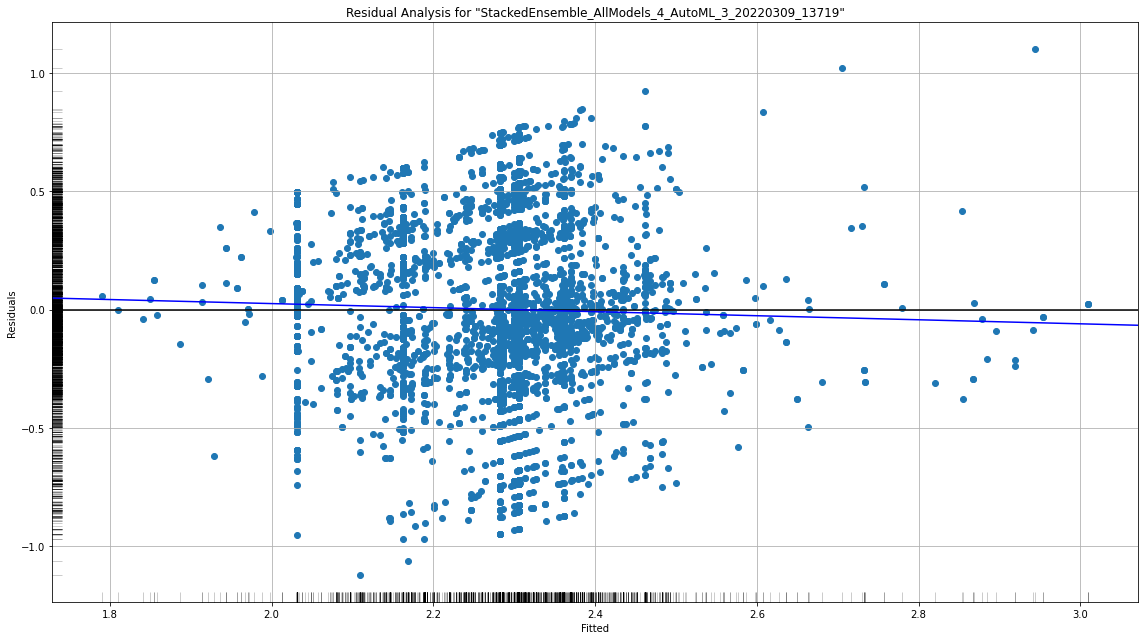

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

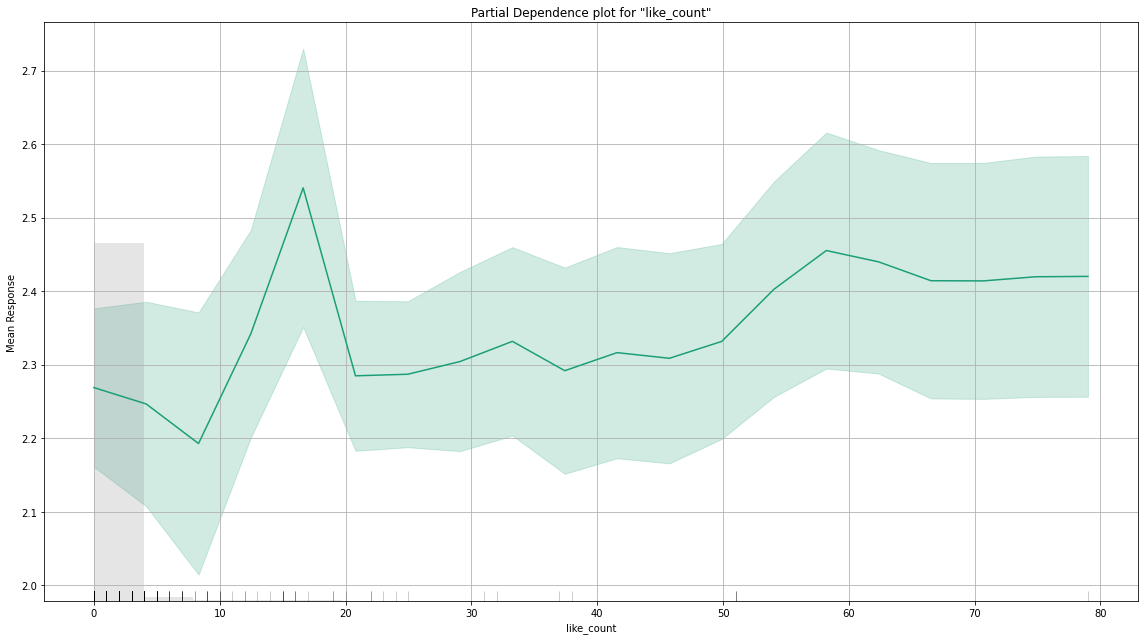

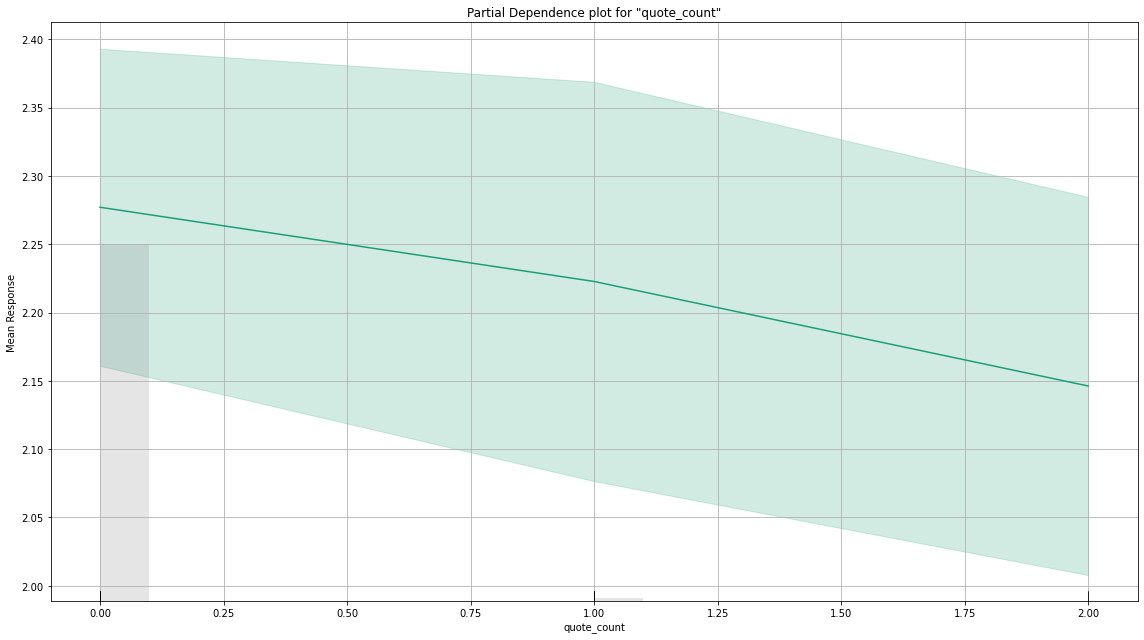

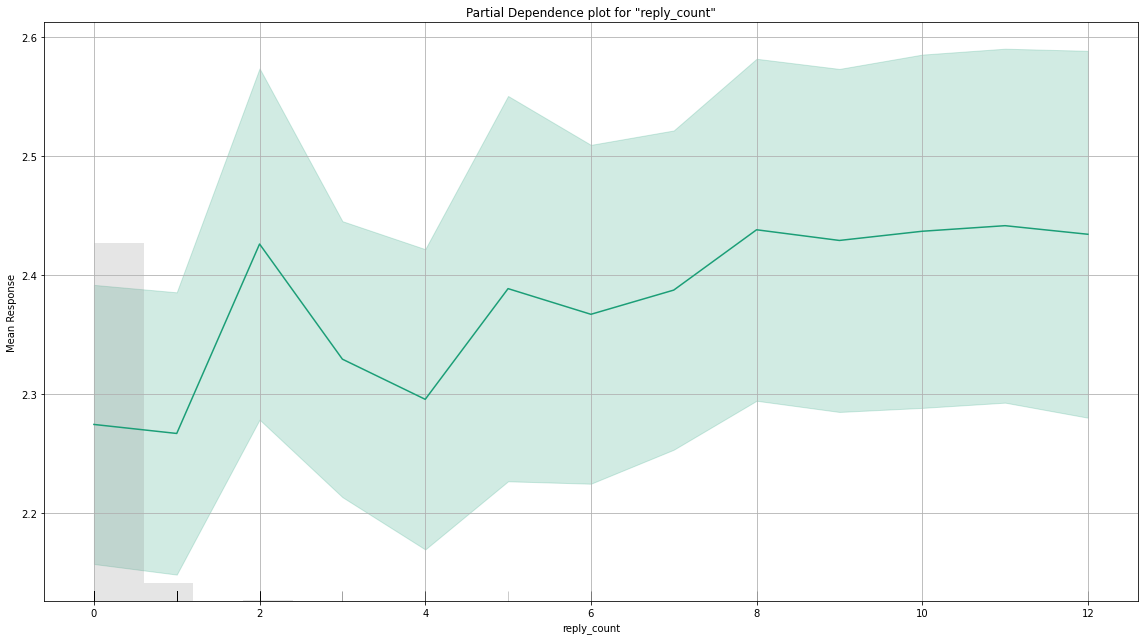

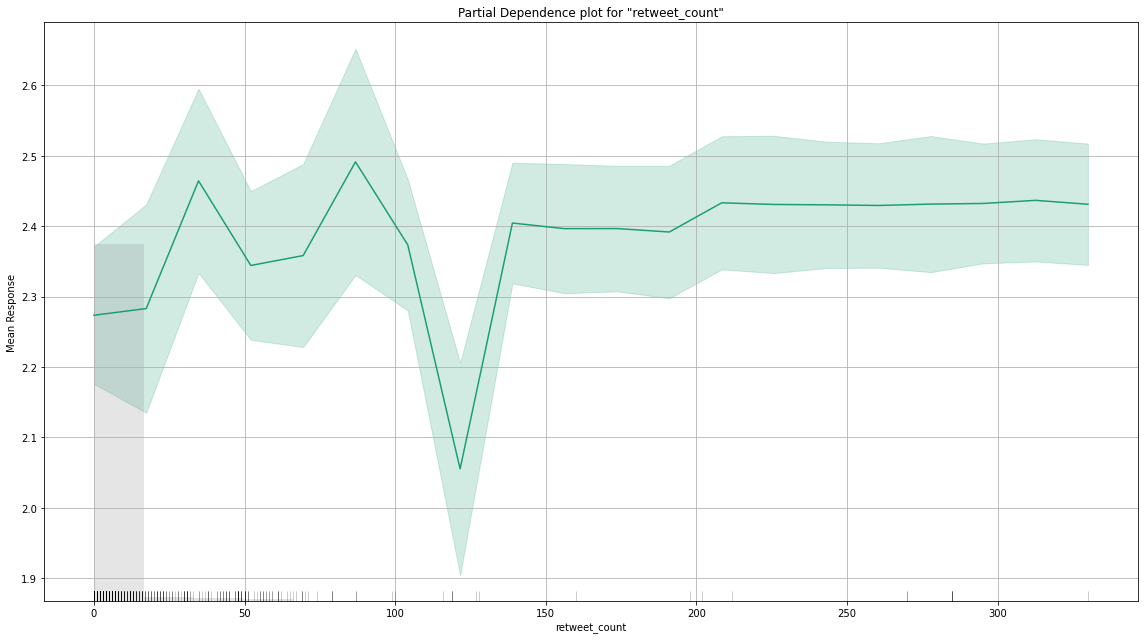

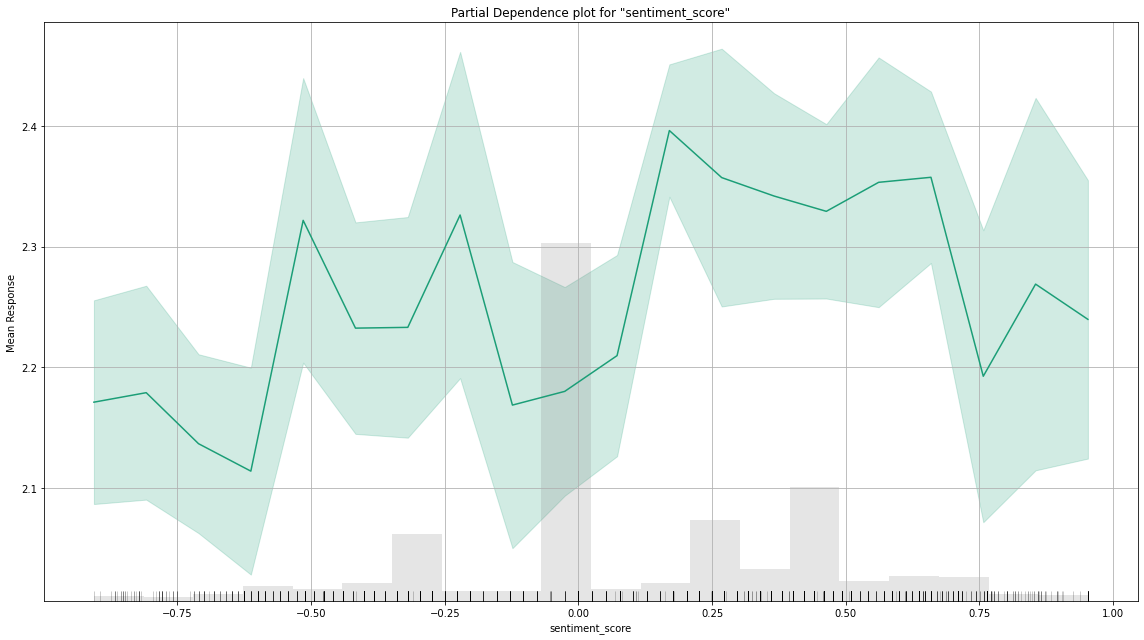

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

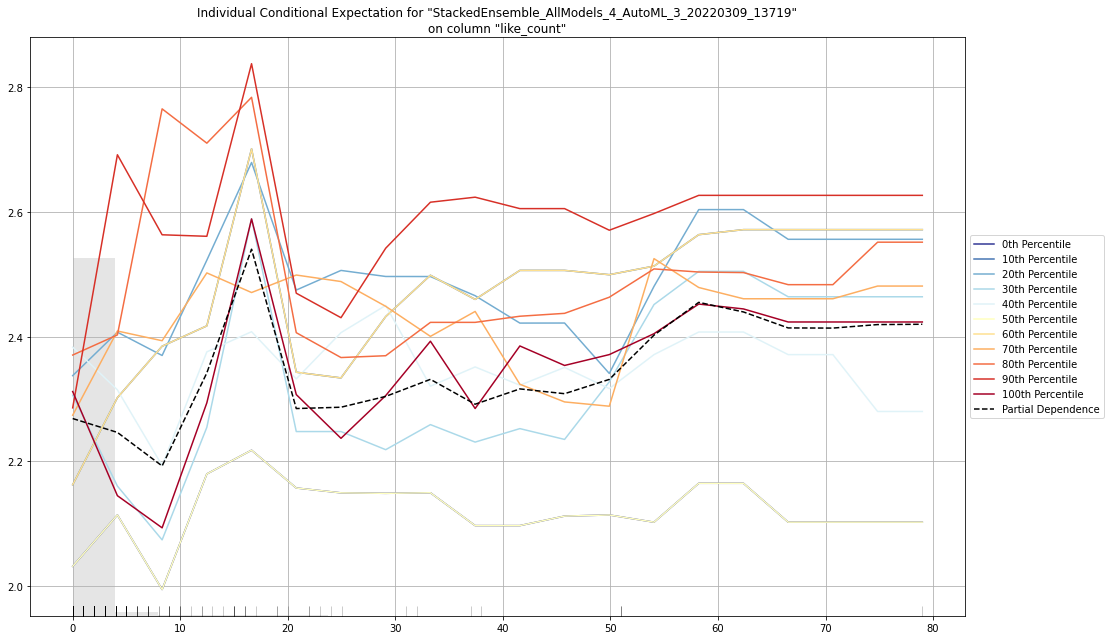

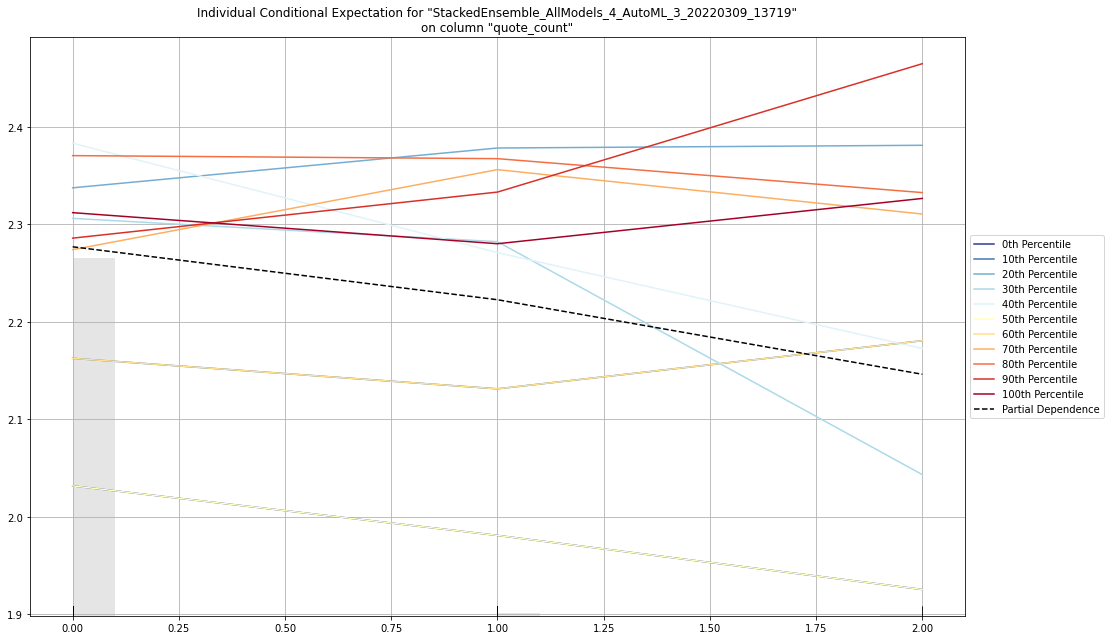

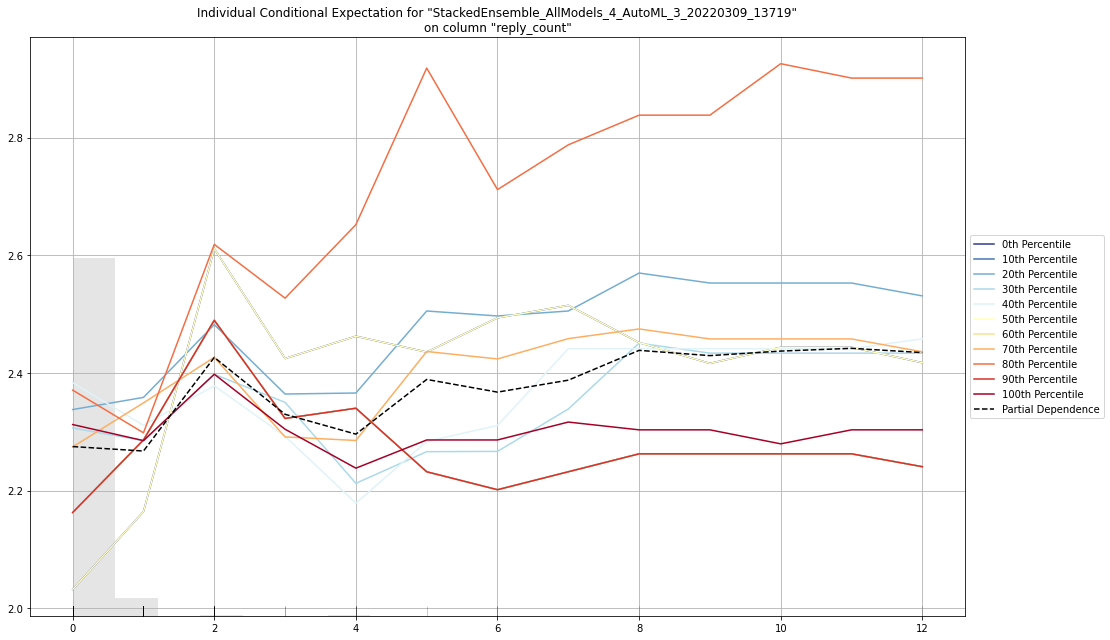

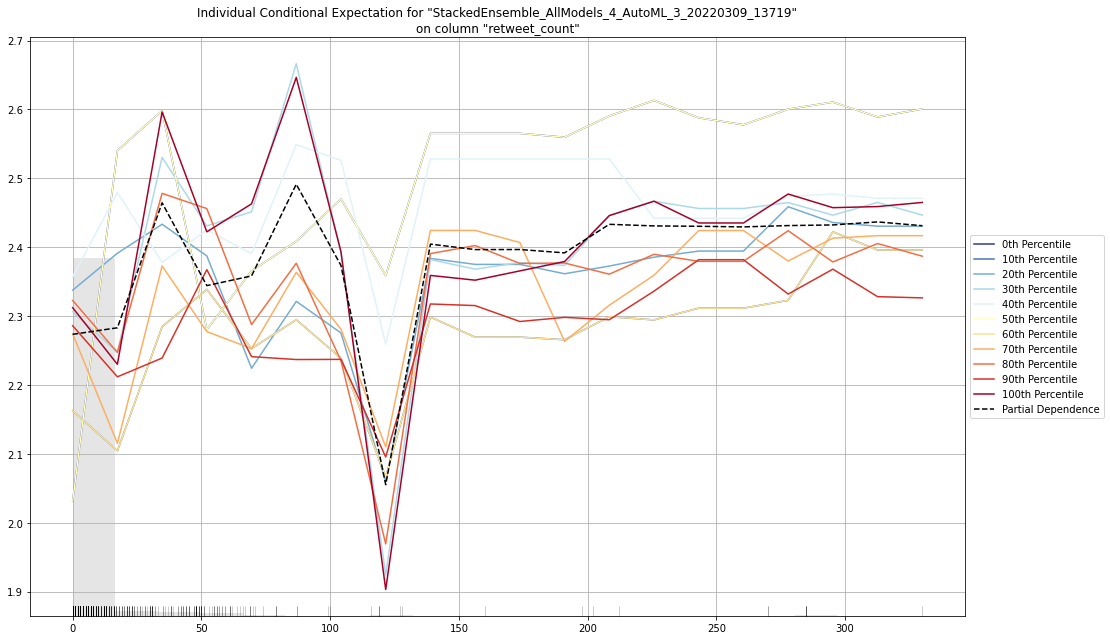

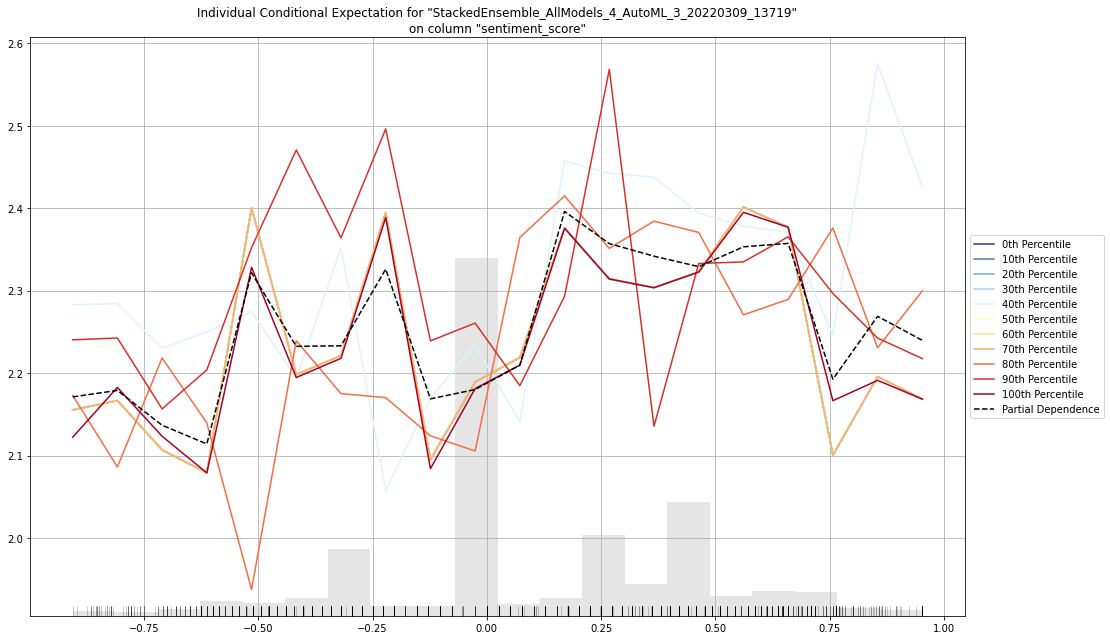

Out[34]: 

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.
<h2o.plot._plot_result._MObject at 0x7f3d850d6b50>


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.
<h2o.plot._plot_result._MObject at 0x7f3d85003820>
<h2o.plot._plot_result._MObject at 0x7f3d85071be0>
<h2o.plot._plot_result._MObject at 0x7f3d84fa8790>
<h2o.plot._plot_result._MObject at 0x7f3d84f05bb0>
<h2o.plot._plot_result._MObject at 0x7f3d7fa25a90>


# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.
<h2o.plot._plot_result._MObject at 0x7f3d84e29b20>
<h2o.plot._plot_result._MObject at 0x7f3d7f89c610>
<h2o.plot._plot_result._MObject at 0x7f3d7f99c9a0>
<h2o.plot._plot_result._MObject at 0x7f3d7f6adc40>
<h2o.plot._plot_result._MObject at 0x7f3d7f56d9a0>

In [0]:
import matplotlib_inline, matplotlib
model_automl.get_best_model().explain(df_valid_h2o)

In [0]:
model_automl.get_best_model().model_performance(df_valid_h2o)

Out[35]: 
ModelMetricsRegression: stackedensemble
** Reported on test data. **

MSE: 0.11652550635655935
RMSE: 0.3413583254537076
MAE: 0.26969694917543824
RMSLE: 0.10475052961181872
Mean Residual Deviance: 0.11652550635655935

In [0]:
model_automl.get_best_model().r2()

Out[36]: 0.1607859996792429

In [0]:
ss.stop()